In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random
import cv2
import os
import PIL
from PIL import Image

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow.keras
import tensorflow as tf



from keras.utils.vis_utils import model_to_dot

import glob
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
train_dir = r'data/train'  # Location of training images
validation_dir = r'data/valid' #Location of test images
test_dir =r'data/test' #Location of test images

class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

<ipython-input-3-f2abc9e21b54>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


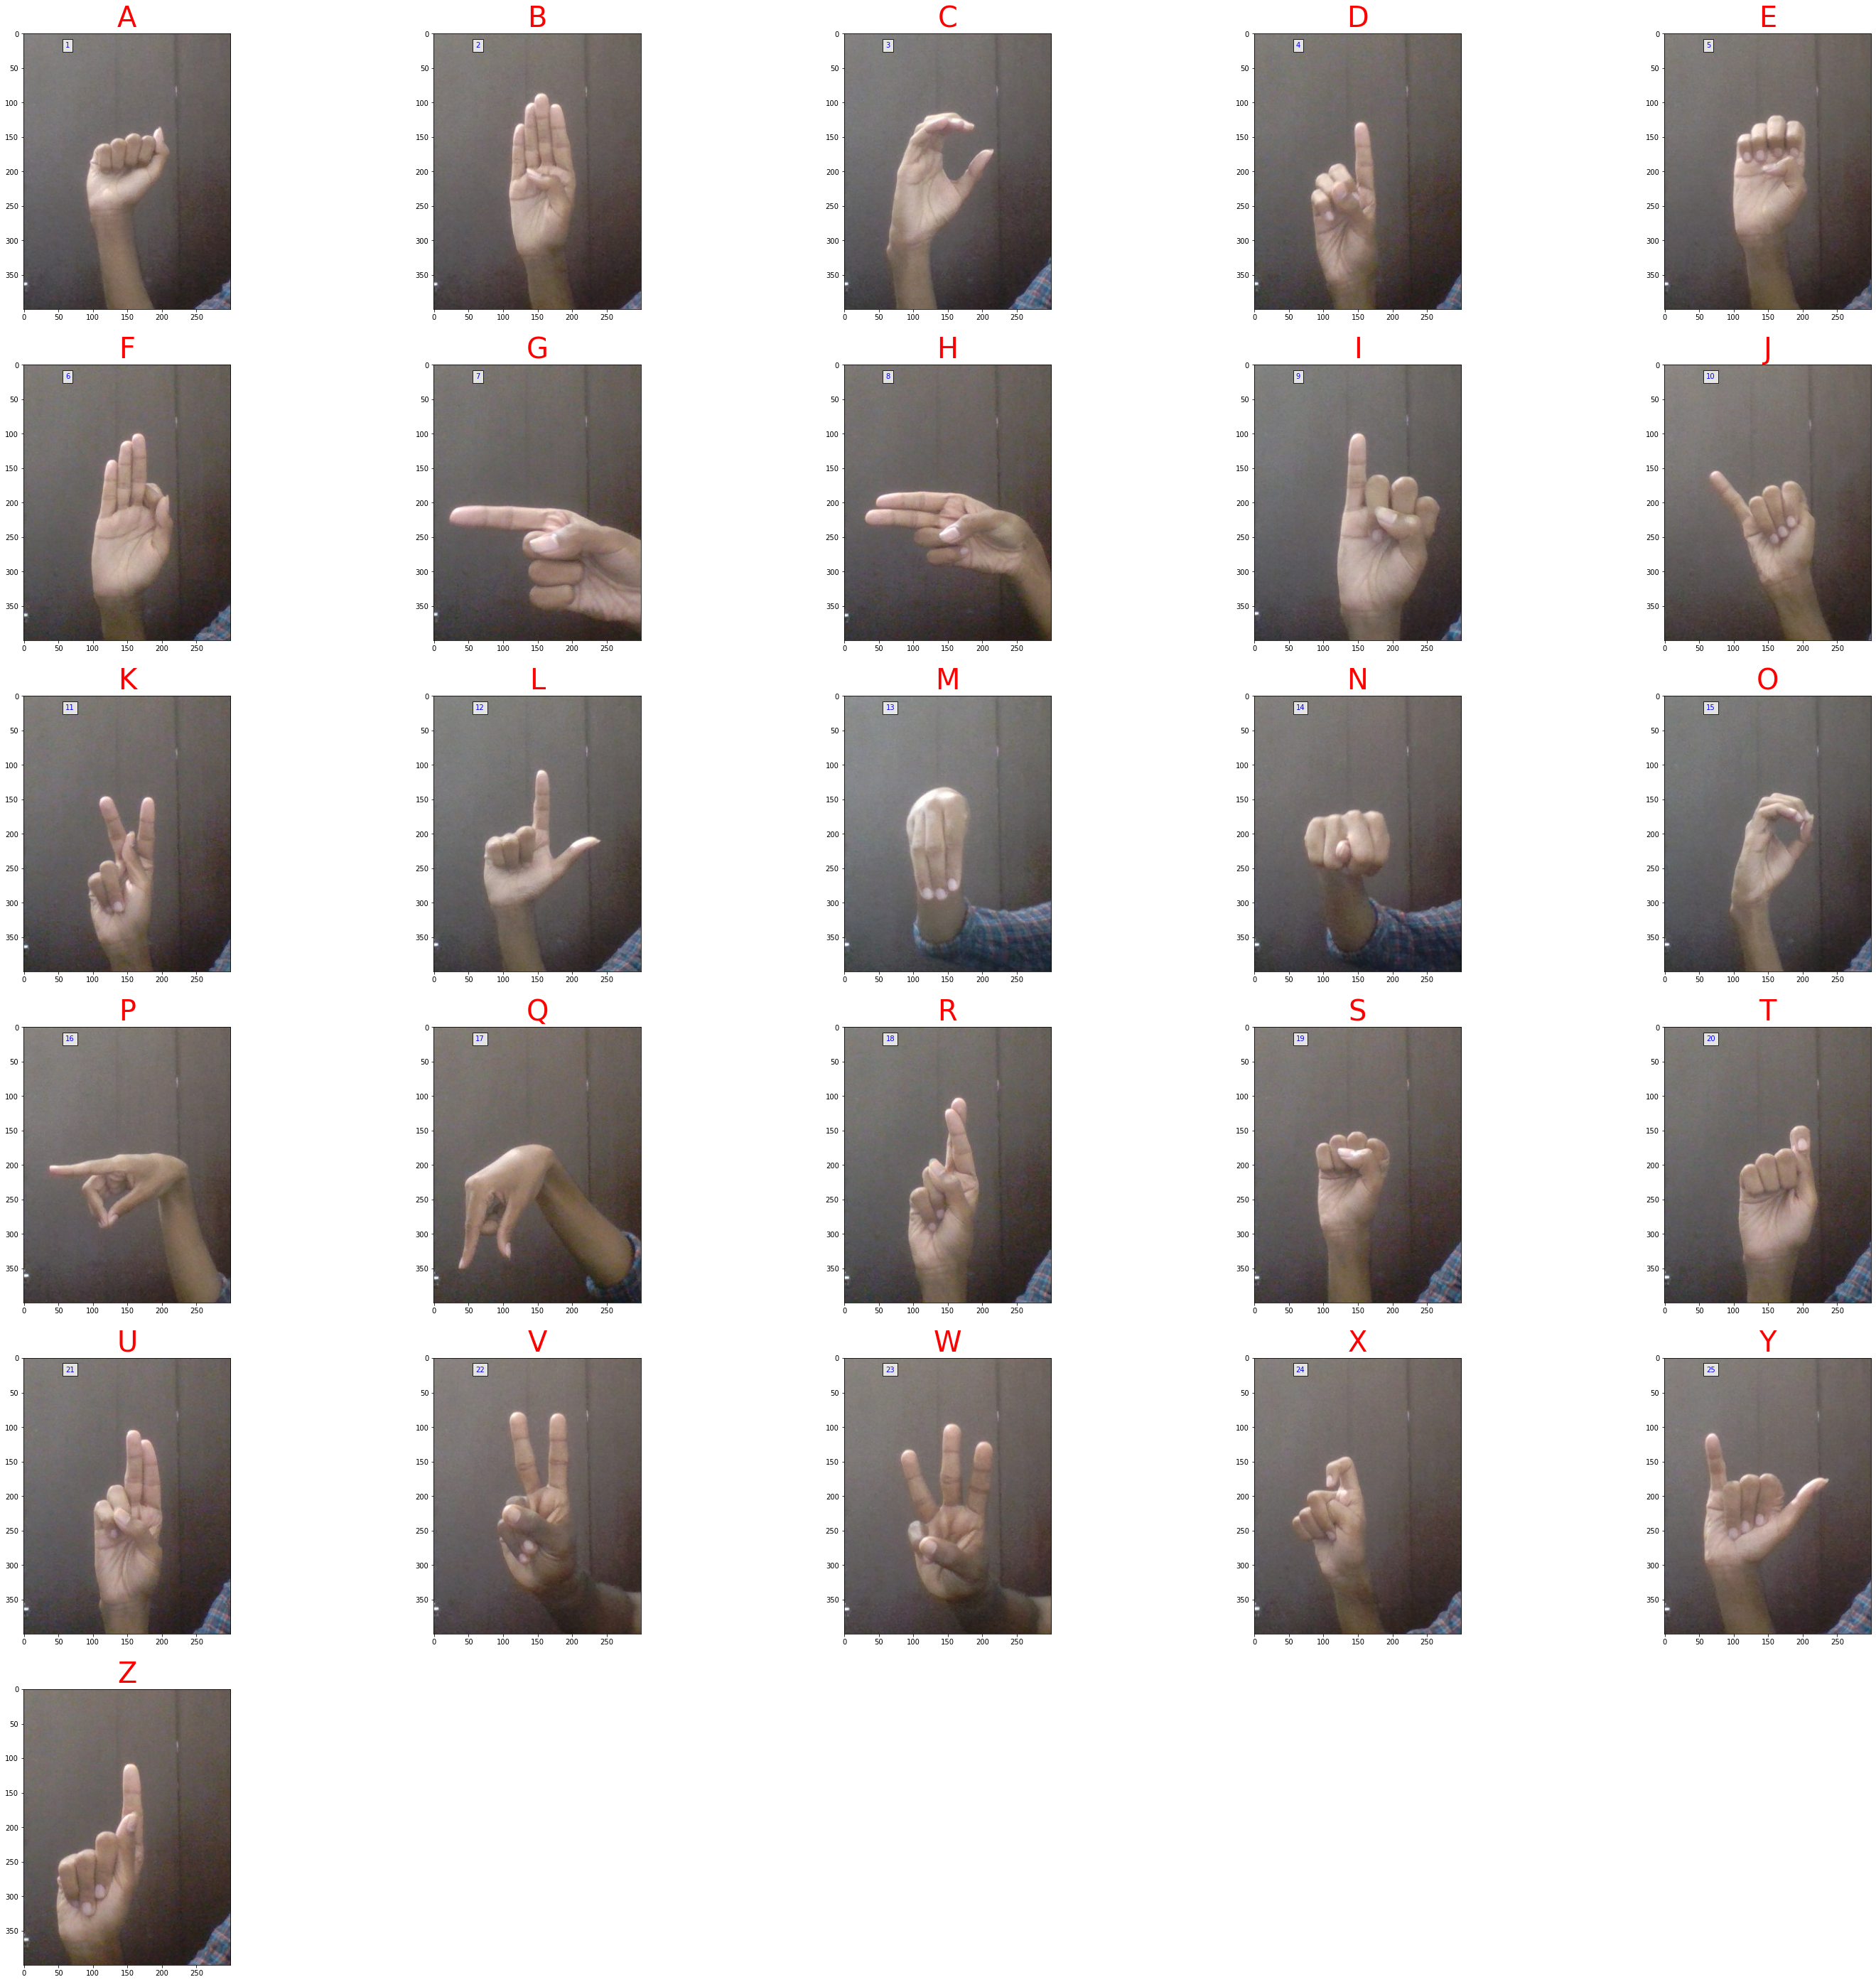

In [3]:


images = []
for img_path in glob.glob('images/*.jpg'):
    images.append(mpimg.imread(img_path))
    


plt.figure(figsize=(50,50))
columns = 5
for i, image in enumerate(images):
    #plt.text(60, 20,i,color='blue',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.title(class_names[i],fontsize=40,color="red")
    plt.imshow(image)

In [4]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    )
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 38706 images belonging to 26 classes.
Found 7886 images belonging to 26 classes.


In [5]:
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(26, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

In [7]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']  
)

In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=100, 
      epochs=20,
      validation_data=val_generator,
      validation_steps=66)  

Epoch 1/20
100/100 [==============================] - 70s 672ms/step - loss: 3.2799 - accuracy: 0.1045 - val_loss: 2.7453 - val_accuracy: 0.3833
Epoch 2/20
100/100 [==============================] - 51s 515ms/step - loss: 1.7599 - accuracy: 0.5540 - val_loss: 0.8188 - val_accuracy: 0.7985
Epoch 3/20
100/100 [==============================] - 54s 535ms/step - loss: 0.8265 - accuracy: 0.7745 - val_loss: 0.5461 - val_accuracy: 0.8712
Epoch 4/20
100/100 [==============================] - 54s 539ms/step - loss: 0.5514 - accuracy: 0.8450 - val_loss: 0.3891 - val_accuracy: 0.8894
Epoch 5/20
100/100 [==============================] - 55s 553ms/step - loss: 0.4466 - accuracy: 0.8780 - val_loss: 0.3132 - val_accuracy: 0.9182
Epoch 6/20
100/100 [==============================] - 54s 541ms/step - loss: 0.3537 - accuracy: 0.9015 - val_loss: 0.2655 - val_accuracy: 0.9288
Epoch 7/20
100/100 [==============================] - 57s 569ms/step - loss: 0.3090 - accuracy: 0.9125 - val_loss: 0.2535 - val_ac

In [9]:
model.save("model1.h5") 

In [10]:
model = tf.keras.models.load_model('model1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 7888 images belonging to 26 classes.


In [12]:
model.evaluate(test_generator, steps=9)

9/9 [==============================] - 2s 161ms/step - loss: 0.1176 - accuracy: 0.9611


[0.11758130043745041, 0.9611111283302307]

In [13]:
Y_pred = model.predict_generator(test_generator, steps=8741 )
y_pred = np.argmax(Y_pred, axis=1)

C:\Users\jerry\anaconda3\envs\miniproject2\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [20]:
check_dir = "C:\\Users\\jerry\\Desktop\\11. one full presenation\\1.Normal\\check"

check_generator = val_datagen.flow_from_directory(
        check_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 2 images belonging to 1 classes.


In [21]:
def labeles(l):
    for i in range(len(l)):
        if l[i] == 1:
            return class_names[i]

0
1


IndexError: index 2 is out of bounds for axis 0 with size 2

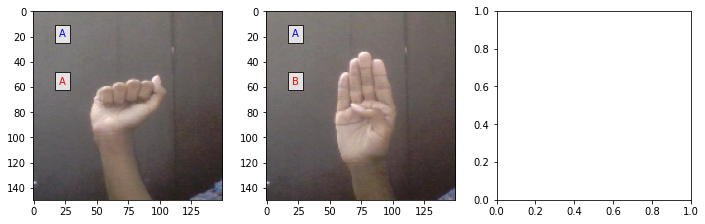

In [24]:
imgs, labels = next(check_generator)
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t= np.expand_dims(imgs[i], axis=0)
    prediction = model.predict(img_t) 
    idx = prediction[0].tolist().index(max(prediction[0]))
    
    print(idx, class_names[idx])
    
    plt.text(20, 58,class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    #actual
    plt.text(20, 20,labeles(labels[i]),color='blue',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])
plt.savefig('model_pred.png')